In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime as datetime
import csv

In [2]:
sodar_files=glob.glob('D:/plots_result_data/DATA/SLP_SODAR/*.mnd')
sodar_files

['D:/plots_result_data/DATA/SLP_SODAR\\210217.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210218.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210220.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210221.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210222.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210223.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210224.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210225.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210226.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210227.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210301.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210302.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210303.mnd',
 'D:/plots_result_data/DATA/SLP_SODAR\\210304.mnd']

In [182]:
sd_u,sd_v,sd_w,sd_ws,sd_wd=[],[],[],[],[];sodar_fdata=[]
for file in sodar_files:
    sd=[]
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            if (len(row) == 0):
                continue
            sd.append(row)

    df=pd.DataFrame(sd)
    dt=[col[:19] for col in df[0] if col.startswith(('202'))]
    dt1=pd.to_datetime(dt,format="%Y-%m-%d %H:%M:%S")

    df2=pd.read_csv(file,skiprows=71,sep='\s+',encoding='utf-8')
    df2=df2.replace({"99.99":np.nan,"999.9":np.nan,"99.999":np.nan})
    df2=df2.drop(['error'],axis=1);df2.columns=col[1:]
    
    gc=df2.groupby('z')
    sodar_ht=df2['z'][:89].values
    sd_U,sd_V,sd_W,sd_WS,sd_WD=[],[],[],[],[]

    for k in range(len(sodar_ht)):
        sd_U.append(gc.get_group(sodar_ht[k])['U'].values.astype(float))##U
        sd_V.append(gc.get_group(sodar_ht[k])['V'].values.astype(float))##V
        sd_W.append(gc.get_group(sodar_ht[k])['W'].values.astype(float))
        sd_WS.append(gc.get_group(sodar_ht[k])['speed'].values.astype(float))
        sd_WD.append(gc.get_group(sodar_ht[k])['dir'].values.astype(float))

    u_df=pd.DataFrame(sd_U).T
    v_df=pd.DataFrame(sd_V).T
    w_df=pd.DataFrame(sd_W).T
    ws_df=pd.DataFrame(sd_WS).T
    wd_df=pd.DataFrame(sd_WD).T

    u_df.columns=v_df.columns=w_df.columns=ws_df.columns=wd_df.columns=sodar_ht.astype(int)

    u_df['Parameter']='U'
    v_df['Parameter']='V'
    w_df['Parameter']='W'
    ws_df['Parameter']='WS'
    wd_df['Parameter']='WD'

    u_df.insert(0,'Date',dt1[1:])
    v_df.insert(0,'Date',dt1[1:])
    w_df.insert(0,'Date',dt1[1:])
    ws_df.insert(0,'Date',dt1[1:])
    wd_df.insert(0,'Date',dt1[1:])
    
    sd_u.extend(u_df.values)
    sd_u.extend(v_df.values)
    sd_u.extend(w_df.values)
    sd_u.extend(np.array(ws_df))
    sd_u.extend(np.array(wd_df))
sodar_fdata=pd.DataFrame(sd_u,columns=u_df.columns)
# sodar_fdata=pd.DataFrame(sd_v,columns=v_df.columns)
# sodar_fdata=pd.DataFrame(sd_w,columns=w_df.columns)
# sodar_fdata=pd.DataFrame(sd_ws,columns=ws_df.columns)
# sodar_fdata=pd.DataFrame(sd_wd,columns=wd_df.columns)

In [183]:
sodar_fdata.to_csv('D:/plots_result_data/DATA/SLP_SODAR/slp_sodar_17032021to04032021.csv',index=False)
%store sodar_fdata

Stored 'sodar_fdata' (DataFrame)


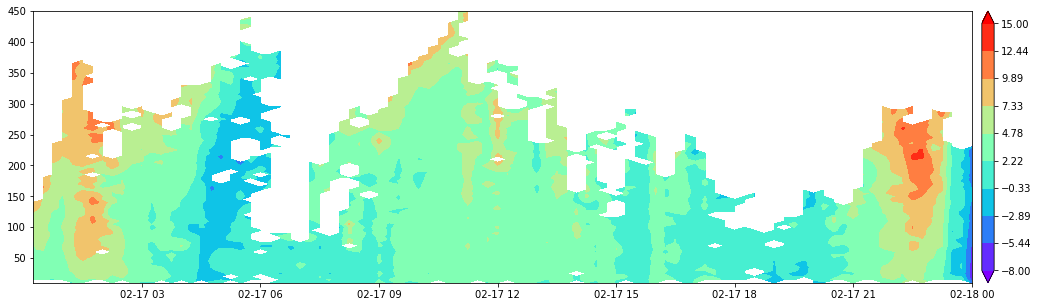

In [43]:
plt.figure(figsize=[20,5])
color=np.linspace(-8,15,10,endpoint=True)
sd=plt.contourf(u_df['Date'].values,sodar_ht.astype(int),u_df.iloc[:,1:-1].values.T,color,cmap='rainbow',extend='both')
plt.colorbar(sd,pad=0.009)

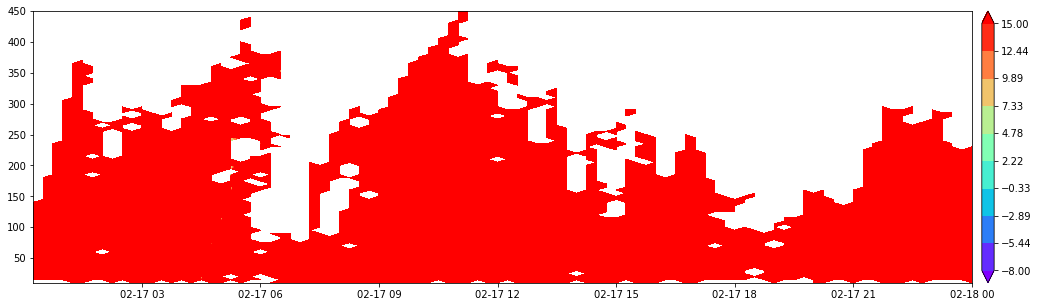

In [44]:
plt.figure(figsize=[20,5])
color=np.linspace(-8,15,10,endpoint=True)
sd=plt.contourf(v_df['Date'].values,sodar_ht.astype(int),ws_df.iloc[:,1:-1].values.T,color,cmap='rainbow',extend='both')
plt.colorbar(sd,pad=0.009)